# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals, Inc's specialization in anti-cancer medications yields promising results for potential treatments for squamous cell carcinoma (SCC). The most recent animal study of 249 mice with SCC tumors found four top contenders amongst ten for most-promising drug treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. These drug regimens aforementioned reported the lowest final tumor volume in (mm3) at 40.68 +/- 4.99, 40.22 +/- 4.85, 52.88 +/- 6.57, and 52.59 +/- 6.27, respectively (see Summary Statistics table below). Comparatively, these four drug regimens also reported the four lowest tumor volume median values at 41.56, 40.22, 52.88, and 52.59, respectively. The Box and Whisker plots reveal that the data used to calculate final tumor volumes for Capomulin, Ramicane, and Ceftamin are all within the IQR, while there was one outlier of 36.32 mm3 shown for Infubinol. Since Capomulin is one of the top two leading drug regimens, it's important to note that an interesting trend occurred when taking a closer look at tumor volume (mm3) vs. timepoint (days) for mouse I509 treated with Capomulin. There were two periods of steady tumor growth followed by a sharp decline. Between days 0 and 20, the tumor volume increased from 45 to 48 mm3. Then, there was a steep decline between days 20 and 25 from 48 to 44 mm3, so the net size decrease was 1mm3. The second growth period occurred between days 25 and 30 from 44 to 45 mm3, followed by a sharp decline from days 30 to 35 from 45 to 40 mm3; the net volume decrease was 4mm3. This is important to note because the efficacy of Capomulin seems to increase over time with shorter growth periods and steeper declines in tumor volume; however, this data is limited to one mouse and more mice should be considered before a conclusion is made. Lastly, a study of average tumor volume (mmm3) vs. weigh (g) revealed a positive, strong correlation of 0.84 between mouse weight and the average tumor volume is 0.84. This suggests that as the weight of the mouse increases, so does the average tumor volume. My recommendation is for the next round of studies to continue with the top-two drug regimens Capomulin and Ramicane over a larger period and to normalize the data set in terms of tumor volume % increases and decreases.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID","Mouse ID"])

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
mouse_count =mouse_df['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicates = mouse_df[mouse_df.duplicated(subset=['Mouse ID' ,'Timepoint'], keep=False)]
mouse_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicates_all = mouse_df[mouse_df['Mouse ID'].isin(mouse_duplicates['Mouse ID'])]
mouse_duplicates_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mouse_df[mouse_df['Mouse ID'].isin(mouse_duplicates['Mouse ID']) == False]
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count =mice_df['Mouse ID'].nunique()
mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_volume = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_volume = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

tumor_summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume, 
                                   'Median Tumor Volume': median_tumor_volume, 
                                   'Tumor Volume Variance': variance_tumor_volume,
                                   'Tumor Volume Std. Dev.': std_tumor_volume,
                                   'Tumor Volume Std. Err.': sem_tumor_volume,
                                  })
tumor_summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_aggregate_statistics = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_aggregate_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

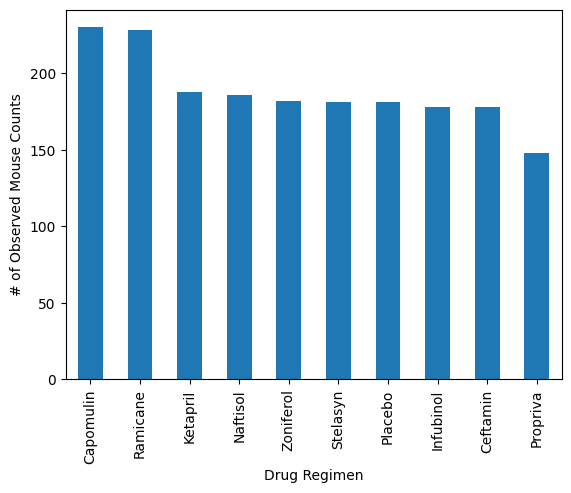

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen = mice_df['Drug Regimen'].value_counts()
drug_regimen.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Counts")
plt.show()

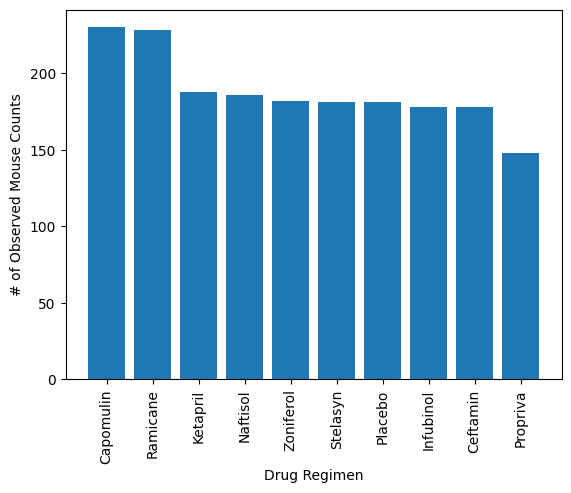

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(drug_regimen.index, drug_regimen.values)
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Counts")
plt.show()

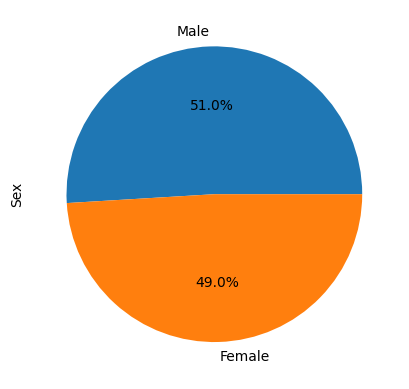

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = mice_df['Sex'].value_counts()
gender_plot = mice_gender.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('Sex')
plt.show()

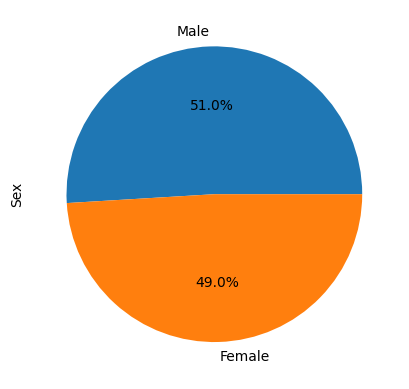

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, labels=['Male', 'Female'], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = mice_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_df = pd.merge(mice_df, max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = four_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.     
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)    
    
# add subset     
# Determine outliers using upper and lower bounds
i = 0
for drug in treatment_list:
    vols = tumor_vol_list[i]
    quartiles = vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = vols[(vols < lower_bound) | (vols > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    i+=1

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


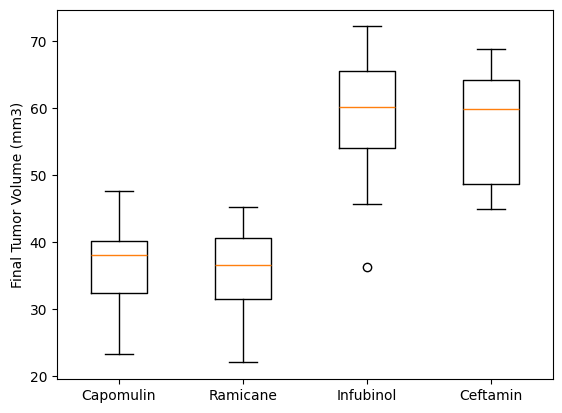

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_list)
ax1.set_xticklabels(treatment_list, fontsize=10)
plt.xlabel
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

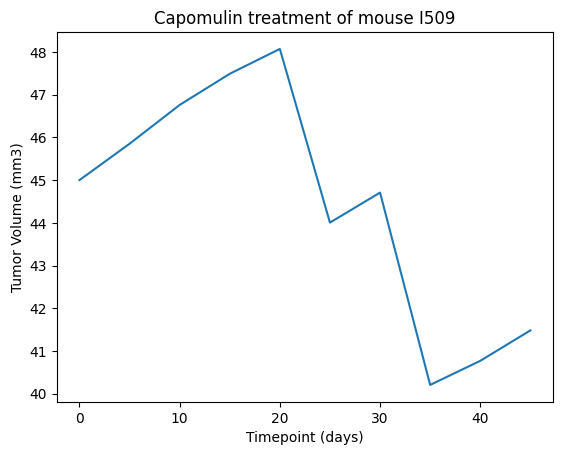

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
myMouse = mice_df[mice_df['Mouse ID'] == 'l509']
myMouse
plt.plot(myMouse['Timepoint'], myMouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse I509')
plt.show()

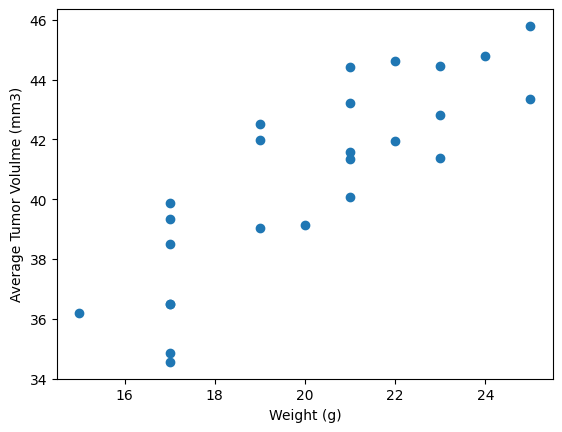

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = mice_df[mice_df['Drug Regimen'] == 'Capomulin']
weight = capomulin.groupby('Mouse ID')['Weight (g)'].mean()
avgSize = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(weight, avgSize)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volulme (mm3)')
plt.show()

## Correlation and Regression

 The correlation between mouse weight and the average tumor volume is: 0.8419363424694722


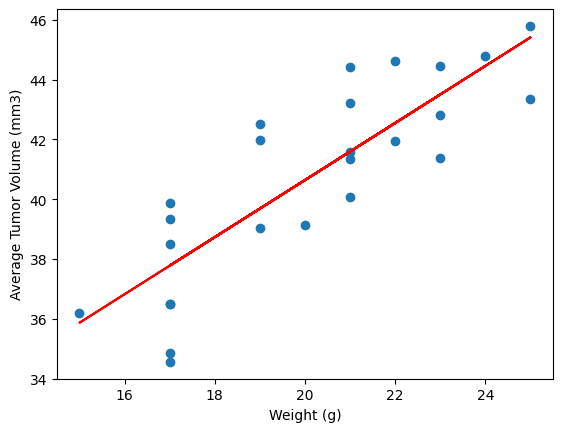

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = weight.corr(avgSize)
print(f" The correlation between mouse weight and the average tumor volume is: {corr}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgSize)
fit = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avgSize)
plt.plot(weight, fit, "r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()